In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv('survey_results_public.csv')
print('size of df is:', df.shape)
df.head().T

size of df is: (73268, 79)


,0,1,2,3,4
ResponseId,1,2,3,4,5
MainBranch,None of these,I am a developer by profession,"I am not primarily a developer, but I write co...",I am a developer by profession,I am a developer by profession
Employment,NaN,"Employed, full-time","Employed, full-time","Employed, full-time","Employed, full-time"
RemoteWork,NaN,Fully remote,"Hybrid (some remote, some in-person)",Fully remote,"Hybrid (some remote, some in-person)"
CodingActivities,NaN,Hobby;Contribute to open-source projects,Hobby,I don’t code outside of work,Hobby
...,...,...,...,...,...
TrueFalse_2,NaN,NaN,NaN,NaN,NaN
TrueFalse_3,NaN,NaN,NaN,NaN,NaN
SurveyLength,NaN,Too long,Appropriate in length,Appropriate in length,Too long
SurveyEase,NaN,Difficult,Neither easy nor difficult,Easy,Easy


**Feature Selection**

In [3]:
df = df[['Country', 'EdLevel', 'YearsCodePro', 'Employment', 'ConvertedCompYearly']]
df = df.rename({'ConvertedCompYearly': 'Salary'}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN
1,Canada,NaN,NaN,"Employed, full-time",NaN
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",215232.0
4,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,"Employed, full-time",NaN


In [4]:
# subset to where salary is not null
df = df[df['Salary'].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",215232.0
8,Netherlands,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Employed, full-time",49056.0
10,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,"Employed, full-time",60307.0
11,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,"Employed, full-time;Independent contractor, fr...",194400.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38071 entries, 2 to 73121
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       38071 non-null  object 
 1   EdLevel       38054 non-null  object 
 2   YearsCodePro  37935 non-null  object 
 3   Employment    38067 non-null  object 
 4   Salary        38071 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.7+ MB


In [6]:
df['Employment'].unique()

array(['Employed, full-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Independent contractor, freelancer, or self-employed',
       'Employed, part-time',
       'Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Employed, part-time', 'I prefer not to say',
       nan,
       'Independent contractor, freelancer, or self-employed;Retired',
       'Retired', 'Employed, part-time;Retired',
       'Employed, full-time;Retired',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Retired'],
      dtype=object)

In [7]:
# subset to full employment only
df = df[df['Employment'] == 'Employed, full-time']
df = df.drop('Employment', axis=1)
df.shape

(31502, 4)

In [8]:
df.isnull().sum()/len(df)

Country         0.000000
EdLevel         0.000413
YearsCodePro    0.003524
Salary          0.000000
dtype: float64

In [9]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Salary          0
dtype: int64

- Countries

In [10]:
df['Country'].value_counts().head(30)

United States of America                                7858
Germany                                                 2382
United Kingdom of Great Britain and Northern Ireland    2341
India                                                   1869
Canada                                                  1249
France                                                  1126
Brazil                                                  1014
Spain                                                    858
Netherlands                                              701
Australia                                                700
Italy                                                    667
Poland                                                   572
Sweden                                                   561
Russian Federation                                       425
Switzerland                                              416
Turkey                                                   361
Israel                  

In [11]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [12]:
country_map = shorten_categories(df.Country.value_counts(), 220)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

United States of America                                7858
Other                                                   5320
Germany                                                 2382
United Kingdom of Great Britain and Northern Ireland    2341
India                                                   1869
Canada                                                  1249
France                                                  1126
Brazil                                                  1014
Spain                                                    858
Netherlands                                              701
Australia                                                700
Italy                                                    667
Poland                                                   572
Sweden                                                   561
Russian Federation                                       425
Switzerland                                              416
Turkey                  

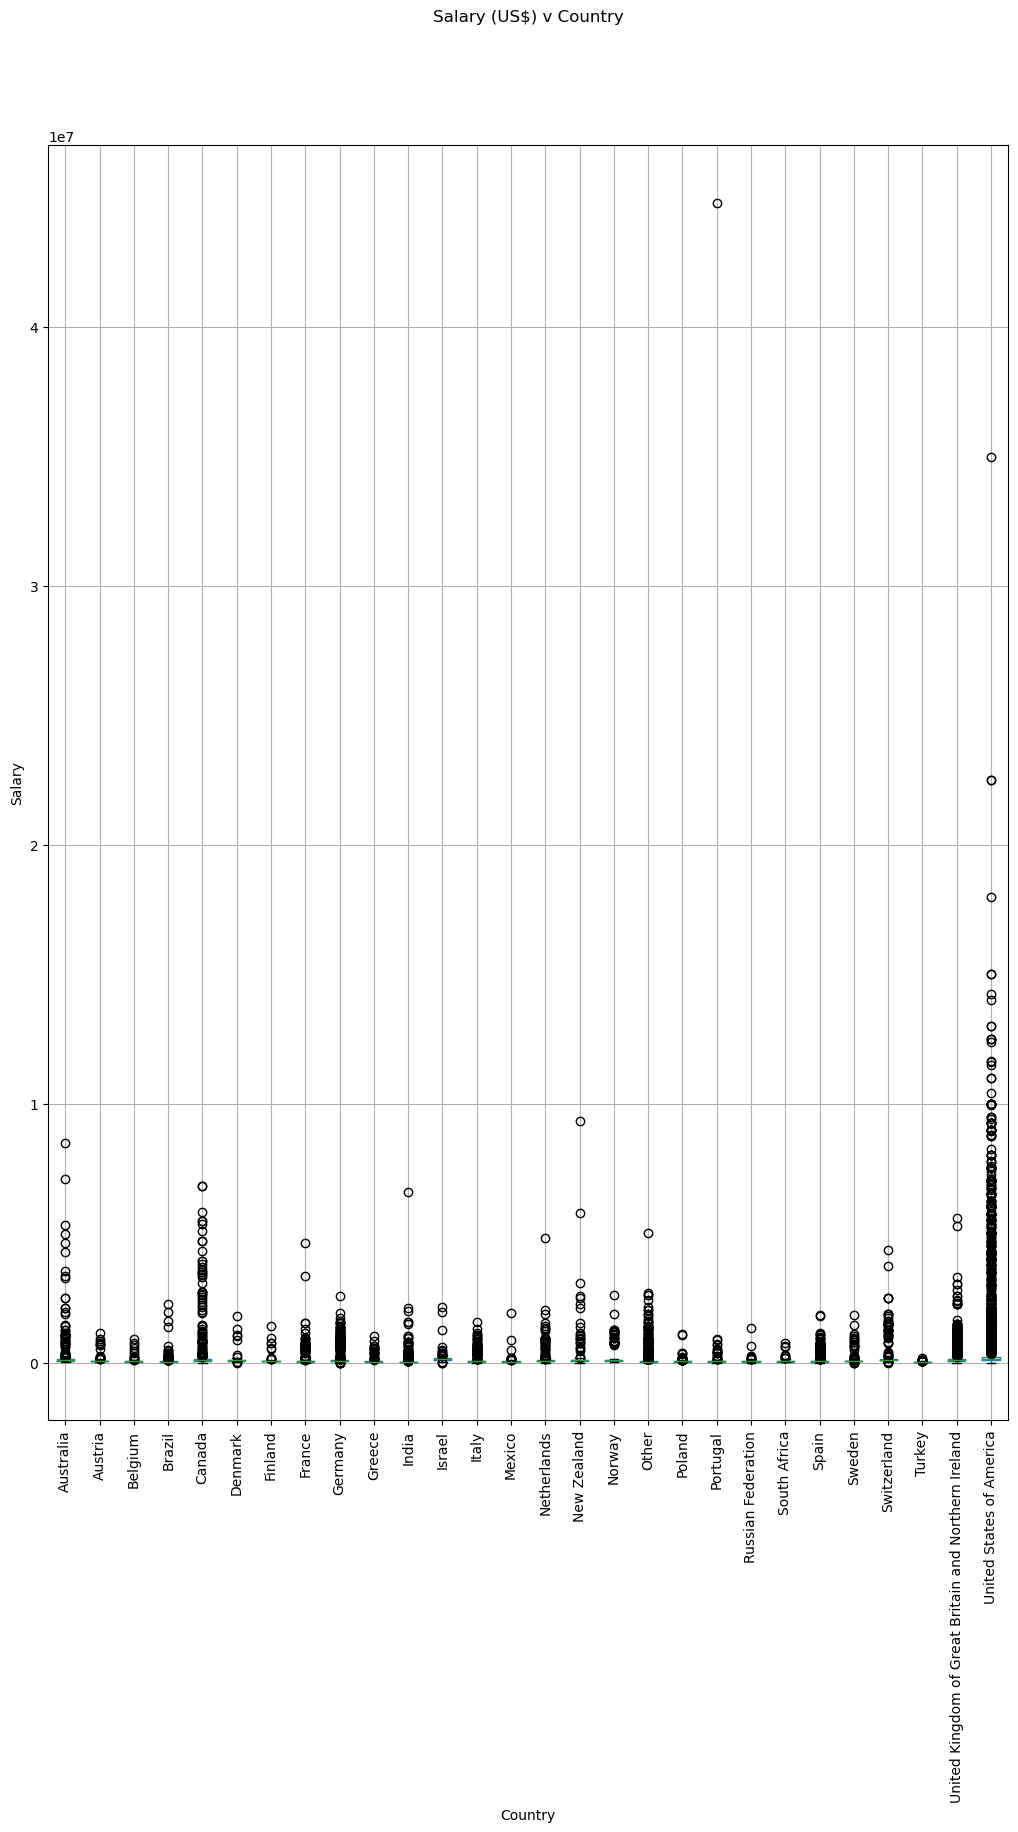

In [13]:
fig, ax = plt.subplots(1,1, figsize=(12, 17))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show();

- Salary 

In [14]:
# subset the Salary
df = df[df['Salary'] <=250000]
df = df[df['Salary'] >= 10000]
# exclude the Other category
df = df[df['Country'] != 'Other']

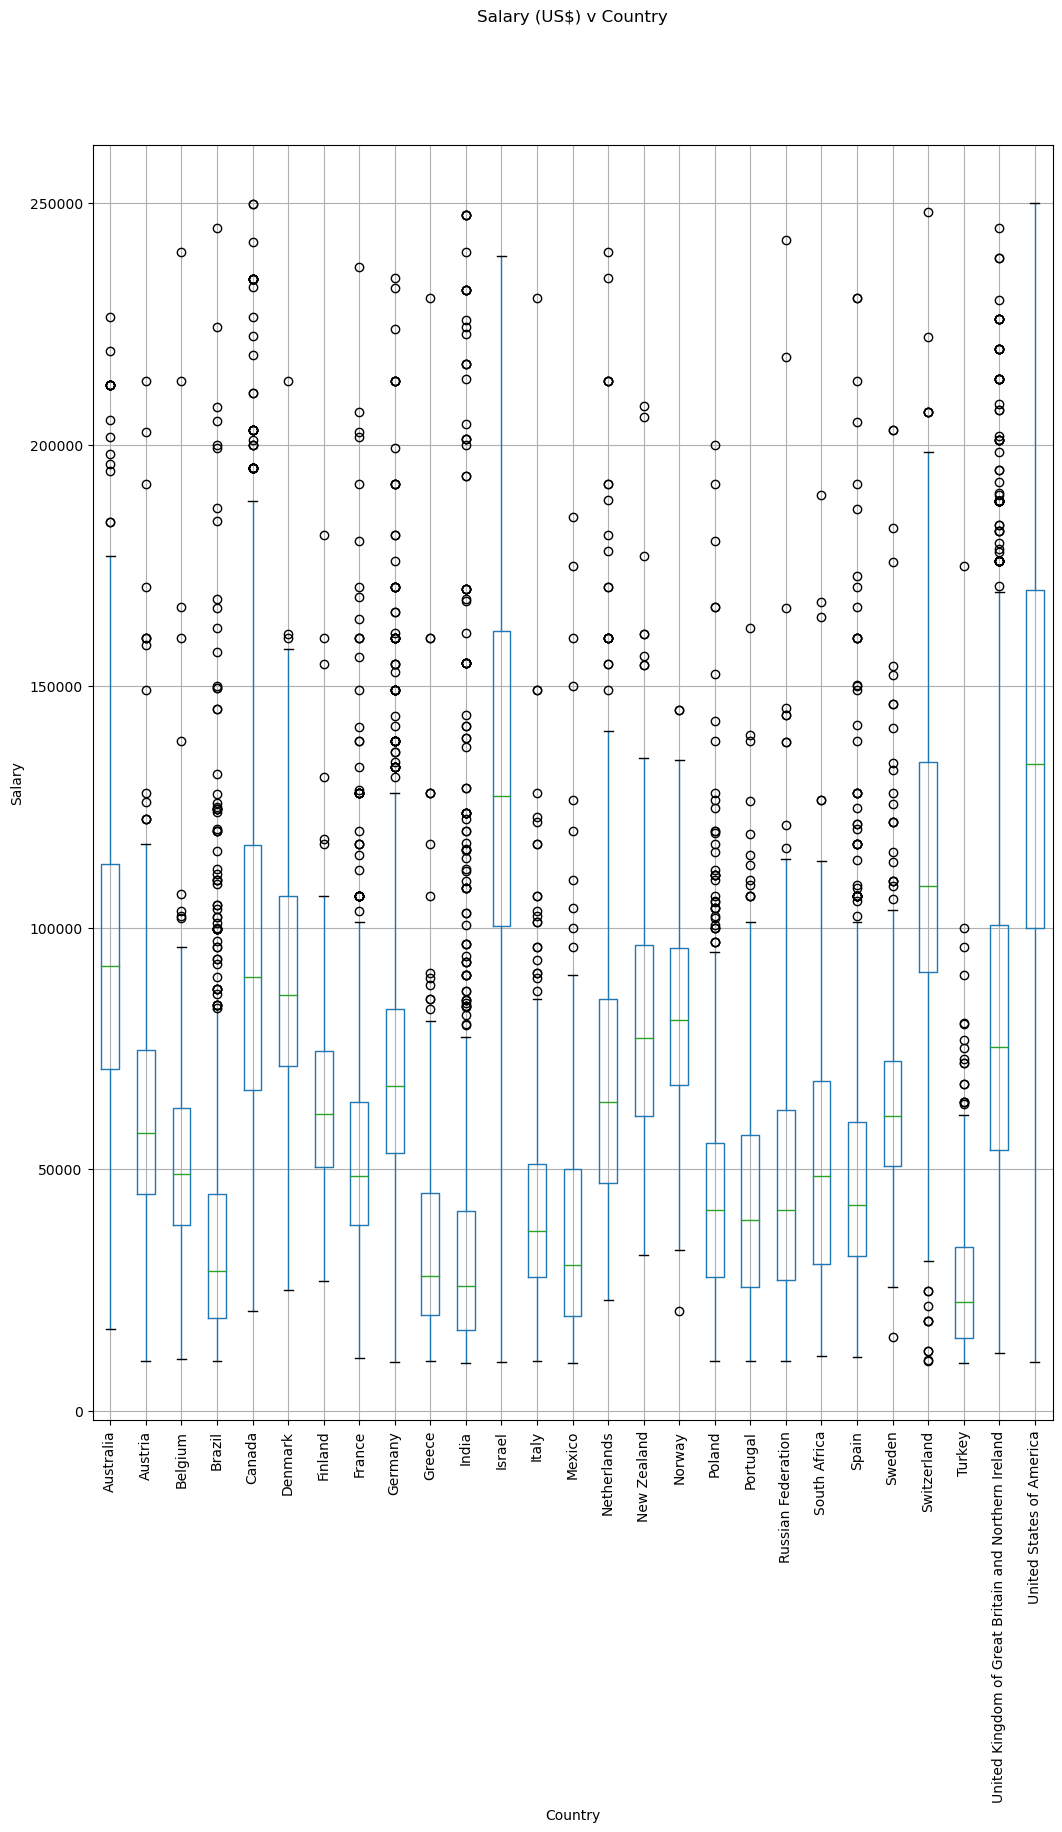

In [15]:
fig, ax = plt.subplots(1,1, figsize=(12, 17))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show();

- Years Coding Professionally

In [16]:
df['YearsCodePro'].unique()

array(['5', '17', '6', '2', '10', '22', '4', '20', '9', '14', '21', '15',
       '3', '25', '7', '8', '12', '19', '24', '1', '11', '23',
       'Less than 1 year', '18', '37', '46', '13', '32', '27', '28', '16',
       '31', '30', '34', '35', '26', '42', '38', '36', '40', '41', '29',
       '33', '39', '48', '45', '44', '43', 'More than 50 years', '47',
       '49', '50'], dtype=object)

In [17]:
def class_experience(x):
    if x == 'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(class_experience)

In [18]:
df['YearsCodePro'].dtype

dtype('float64')

- Education Level

In [19]:
df['EdLevel'].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else', 'Associate degree (A.A., A.S., etc.)',
       'Some college/university study without earning a degree',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school'], dtype=object)

In [20]:
def clean_education(x):
    if "Bachelor’s degree" in x:
        return "Bachelor's degree"
    if "Master’s degree" in x:
        return "Master's degree"
    if 'Professional degree' in x or 'Other doctoral degree' in x:
        return 'Post Grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [21]:
df['EdLevel'].unique()

array(["Master's degree", "Bachelor's degree", 'Less than a Bachelors',
       'Post Grad'], dtype=object)

> Preprocessing

In [22]:
from sklearn.preprocessing import LabelEncoder
edu_label = LabelEncoder()
df['EdLevel'] = edu_label.fit_transform(df['EdLevel'])
df['EdLevel'].unique()

array([2, 0, 1, 3])

In [23]:
country_label = LabelEncoder()
df['Country'] = country_label.fit_transform(df['Country'])
df['Country'].unique()

array([25, 11, 14, 26,  1, 12,  4,  8, 17, 16,  7,  3, 22, 21, 24, 10,  2,
       13, 23, 20,  6,  5,  0,  9, 18, 19, 15])

> Model Building

In [24]:
# Split train and test
X = df.drop('Salary', axis=1)
y = df['Salary']

In [25]:
from sklearn.linear_model import Ridge
ridge = Ridge(random_state=42)
ridge.fit(X, y)

Ridge(random_state=42)

In [26]:
y_pred = ridge.predict(X)
y_pred[:5]

array([ 96439.76763458,  89841.67643104,  73045.80742852,  93221.02323947,
       101290.94337364])

- Evaluate

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))

In [28]:
error

45605.65900885664

    high

In [29]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=0)
model.fit(X,y)

RandomForestRegressor(random_state=0)

In [30]:
y_pred = model.predict(X)
y_pred[:3]

array([ 82873.50924413, 166362.48914286,  65335.46781131])

In [31]:
error = np.sqrt(mean_squared_error(y, y_pred))
print(f'$', round(error,2))

$ 32218.44


    still high

> Hyperparameter Tuning

In [32]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2, 4, 6, 8, 10, 12]
parameters = {'max_depth': max_depth}

regressor = RandomForestRegressor(random_state=42)
gs = GridSearchCV(regressor, parameters, scoring= 'neg_mean_squared_error')
gs.fit(X, y)

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [33]:
regressor = gs.best_estimator_

regressor.fit(X, y)
y_pred = regressor.predict(X)
error =np.sqrt(mean_squared_error(y, y_pred))
print(f'$', round(error,2))

$ 33285.12


In [34]:
X[:5]

,Country,EdLevel,YearsCodePro
2,25,2,5.0
3,11,0,17.0
8,14,2,6.0
10,25,0,2.0
12,26,0,5.0


In [35]:
#%pip install xgboost

In [36]:
# extract text features 
cats = X.select_dtypes(exclude=np.number).columns.tolist()

# convert to pandas category
for col in cats:
    X[col] = X[col].astype('category')


In [37]:
X.dtypes

Country           int32
EdLevel           int32
YearsCodePro    float64
dtype: object

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
# Split train and test
X = df.drop('Salary', axis=1)
y = df['Salary']

In [40]:
# split data 
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, random_state=42, test_size=0.2)

In [41]:
import xgboost as xgb

In [42]:
# create regression matrices
dtrain = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [43]:
# define params
params = {"objective": "reg:squarederror"} #, "tree_method": "gpu_hist"}

n=100
model_xgb = xgb.train(params=params,
                   dtrain=dtrain, 
                   num_boost_round=n)

In [45]:
from sklearn.metrics import mean_squared_error

preds = model_xgb.predict(dtest)

In [46]:
rmse = mean_squared_error(y_test, preds, squared=False)

print(f'RMSE of baseline model: {rmse:.3f}')

RMSE of baseline model: 34510.660


In [48]:
params = {"objective": "reg:squarederror"}

n=100

evals = [(dtest, 'train'), (dtest, 'validation')]

model_xgb = xgb.train(params=params,
                  dtrain=dtrain,
                  num_boost_round=n, 
                  evals=evals)
                  

[0]	train-rmse:75602.00521	validation-rmse:75602.00521
[1]	train-rmse:58549.77235	validation-rmse:58549.77235
[2]	train-rmse:48055.89046	validation-rmse:48055.89046
[3]	train-rmse:41879.32253	validation-rmse:41879.32253
[4]	train-rmse:38507.44438	validation-rmse:38507.44438
[5]	train-rmse:36455.64331	validation-rmse:36455.64331
[6]	train-rmse:35424.22406	validation-rmse:35424.22406
[7]	train-rmse:34792.32268	validation-rmse:34792.32268
[8]	train-rmse:34505.61190	validation-rmse:34505.61190
[9]	train-rmse:34270.74871	validation-rmse:34270.74871
[10]	train-rmse:34174.11550	validation-rmse:34174.11550
[11]	train-rmse:34039.43395	validation-rmse:34039.43395
[12]	train-rmse:34026.81779	validation-rmse:34026.81779
[13]	train-rmse:33979.18897	validation-rmse:33979.18897
[14]	train-rmse:33987.57258	validation-rmse:33987.57258
[15]	train-rmse:33962.79017	validation-rmse:33962.79017
[16]	train-rmse:33974.64985	validation-rmse:33974.64985
[17]	train-rmse:33977.07867	validation-rmse:33977.07867
[1

In [49]:
params = {"objective": "reg:squarederror"}

n=10000
model_xgb = xgb.train(params=params,
                  dtrain=dtrain,
                  num_boost_round=n,
                  evals=evals,
                  verbose_eval=50,
                  early_stopping_rounds=50
                 )


[0]	train-rmse:75602.00521	validation-rmse:75602.00521
[50]	train-rmse:34180.22292	validation-rmse:34180.22292
[65]	train-rmse:34311.59498	validation-rmse:34311.59498


In [50]:
# cross validation
params = {"objective": "reg:squarederror"}

n=1000
results = xgb.cv(params=params,
                  dtrain=dtrain,
                  num_boost_round=n,
                  nfold=5,
                  early_stopping_rounds=20
                 )

In [51]:
results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,76096.202915,200.197108,76137.481914,1060.458268
1,59197.910720,179.536726,59333.046237,888.435406
2,48653.116717,187.358615,48847.843363,701.509181
3,42440.313888,210.197590,42708.959493,581.345493
4,38734.162553,248.875573,39102.868763,452.745729


In [52]:
best_rmse = results['test-rmse-mean'].min()
best_rmse

34295.705234644294

- Test

In [53]:
# User input example : country, ed_level, years code
X = np.array([['United States of America', "Master's degree", 15]])
X

array([['United States of America', "Master's degree", '15']],
      dtype='<U24')

In [54]:
# transformations
X[:, 0] = country_label.transform(X[:,0])
X[:, 1] = edu_label.transform(X[:,1])
X = X.astype(float)
X

array([[26.,  2., 15.]])

In [55]:
y_pred = model.predict(X)
y_pred

C:\miniconda\envs\ml\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([162860.48134056])

> Save Model

In [56]:
import pickle

In [57]:
data = {'model': model, 'country_label': country_label, 'edu_label': edu_label}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [58]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)
    
model = data['model']
country_label = data['country_label']
edu_label = data['edu_label']

In [59]:
y_pred = model.predict(X)
y_pred

C:\miniconda\envs\ml\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([162860.48134056])